# Diffraction

**General objective:** 
provide students with a comprehensive understanding of the phenomenon of diffraction. Through theoretical explanations, simulations, and practical examples, students will develop a clear grasp of diffraction and its significance in various fields of science and technology.

1. [Introduction](#1-introduction)
2. [Fraunhofer Diffraction](#2-fraunhofer-diffraction)

    2.1 [Single-slit diffraction](#21-single-slit-diffraction)

[Bibliography](#bibliography)

## 1. Introduction

**Diffraction** is the phenomenon when waves bend around obstacles or propagating through narrow openings, changing direction and deviating from geometric optics predictions.

- It is a universal wave phenomenon and is characterized by the same laws when observing wave fields of different natures.


- Diffraction is related with the phenomenon of interference, which is formulated in *The Huygens–Fresnel principle* - the main postulate of wave theory, describing and explaining the mechanism of wave propagation.

---
```
Every point on a wave front is itself the source of spherical wavelets, and the secondary wavelets emanating from different points mutually interfere. The sum of these spherical wavelets forms a new wavefront.
```

<div style="text-align: center;">

<img src="./figures/Fig_Huygens+Frenel3.png" alt="The Huygens–Fresnel principle" width="30%"  />

Fig.1. Predicting the location of the new wavefront using the Huygens–Fresnel principle. The arrow shows the direction of wavefront propagation. The position is determined by $v \Delta t$, where $v$ is the speed of its propagation.

</div>

---

There are various analytical models allowing to calculate the diffracted field, for example, the **Kirchhoff diffraction equation**, derived from the wave equation. In this case the mathematical problem of wave diffraction using Huygens' principle is formulated in the form of an integral equation, which in the general cannot be solved.  The diffraction field can be calculated only under specific boundary conditions, when the slit is larger than the wavelength and the values of the wave field and its derivatives are taken as if the screen did not distort the incident wave.

Under these specified conditions, we can derive commonly used approximate solutions for the diffraction field:

-the **Fresnel** diffraction approximation, which is applicable to the near field and for spherical waves.

-the **Fraunhofer** diffraction approximation, which is applicable to the far field and for plane waves.

## 2. Fraunhofer Diffraction

    This analysis applies only to the far field, that is, at a distance much larger than the width of the slit.

###  2.1. Single-slit diffraction

Consider the diffraction of a plane light wave by an infinitely long slit. We can simplify the analysis by ensuring that the length of the gap is much greater than its width. Placing a collecting lens $L$ behind the slit $AB$ and a screen $S$ at the focus of the lens (as shown in Fig. 2) enables us to observe the diffraction pattern. Let the wave surface of the incident wave, the plane of the slit, and the screen be parallel to each other. 

We divide the open part of the wave surface in the region of the slit into Fresnel zones. The width of each zone is chosen so that the difference in wave paths from the edges of these zones is equal $\lambda/2$.

The amplitude of the resulting oscillation at the observation point $P$ on the screen in the focal plane of the lens will be determined by the number of Fresnel zones that fit across the slit width and depends on the diffraction angle $\varphi$.

<div style="text-align: center;">

<img src="./figures/Fig2_single_slit_diffraction.png" alt="The single_slit_diffraction" width="40%"  />

So, a **diffraction minimum** will be observed at point $P$ if the number of zones $m$ is **integer** and **even**:

$$ a\sin\varphi = \pm 2m\frac{\lambda}{2} \quad (m = 1,2,3...)$$

in this case, the amplitude of the resulting oscillation at the point is equal to zero since the oscillations from a pair of neighboring zones cancel each other out.

If the number of Fresnel zones is **odd** - a **diffraction maximum** will be observed at point P:

$$ a\sin\varphi = \pm (2m + 1)\frac{\lambda}{2} \quad (m = 1,2,3...)$$

In the case where $\varphi = 0$, all secondary waves follow identical optical paths from the slit to the observation point. Consequently, the oscillations excited by these waves at point $O$ share the same phase. As a result, a maximum with the greatest intensity will be observed at this point.

The intensity of diffraction depends on various factors, including the angle of observation and the characteristics of the diffracting aperture or obstacle. One common expression for calculating the intensity distribution of diffracted light for a single slit, given by:

$$ I(\varphi) = I_0\left(\frac{sin(\beta)}{\beta}\right)^2$$

where:

$I(\varphi)$ is the intensity of the diffracted light at an angle $\varphi$ from the center of the diffraction pattern;  
$I_0$ is the intensity of the incident wave;  
$\varphi$ is the angle between the direction of observation and the normal to the diffracting aperture or obstacle, that depend on the width of the slit $a$ and the wavelength of the wave $\lambda$, defined as:

$$ \beta  = \frac{\pi a}{\lambda} sin(\varphi).$$

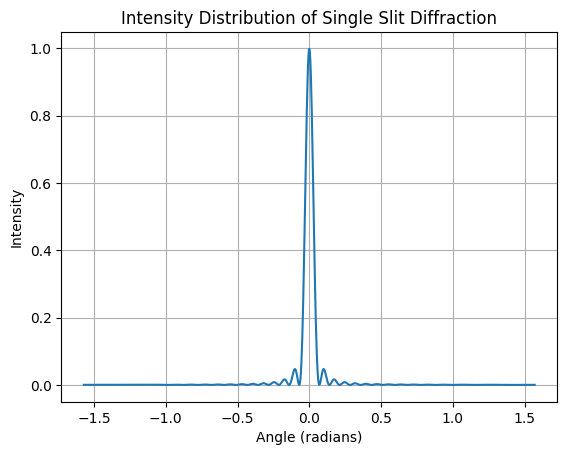

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters 
wavelength = 0.7e-6  # Wavelength of light in meters (e.g., 500 nm)
slit_width = 10e-6   # Width of the slit in meters (e.g., 10 micrometers)


def single_slit_intensity(phi, wavelength, slit_width):
    # Calculate the intensity of light at a given angle theta
    # k = 2 * np.pi / wavelength
    beta = (np.pi * slit_width / wavelength) * np.sin(phi)
    return (np.sin(beta) / beta) ** 2

def plot_intensity_distribution(wavelength, slit_width):
    # Define range of angles
    phi = np.linspace(-np.pi/2, np.pi/2, 1000)
    
    # Calculate intensity distribution
    intensity = single_slit_intensity(phi, wavelength, slit_width)
    
    # Plot the intensity distribution
    plt.plot(phi, intensity)
    plt.xlabel('Angle (radians)')
    plt.ylabel('Intensity')
    plt.title('Intensity Distribution of Single Slit Diffraction')
    plt.grid(True)
    plt.show()

# Plot intensity distribution
plot_intensity_distribution(wavelength, slit_width)

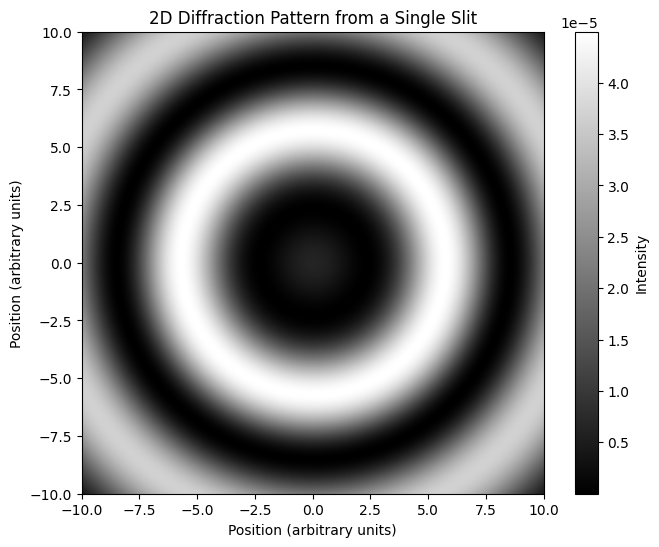

In [17]:
"""
    single slit
"""

import numpy as np
import matplotlib.pyplot as plt

# Constants
wavelength = 0.5 # Wavelength of light (in arbitrary units)
slit_width = 1.0  # Width of the slit (in arbitrary units)
screen_distance = 10.0  # Distance to the screen (in arbitrary units)
screen_size = 20.0  # Size of the screen (in arbitrary units)
num_points = 500  # Number of points on the screen

# Define coordinates on the screen
x = np.linspace(-screen_size / 2, screen_size / 2, num_points)
y = np.linspace(-screen_size / 2, screen_size / 2, num_points)
X, Y = np.meshgrid(x, y)

# Calculate the distance from each point on the screen to the slit
r = np.sqrt(X**2 + Y**2 + screen_distance**2)

# Calculate the phase difference
phase_difference = (2 * np.pi / wavelength) * slit_width * np.sin(np.arctan(r / screen_distance))

# Calculate the intensity using Fresnel diffraction formula
intensity = (slit_width**2 / (wavelength * screen_distance))**2 * (np.sinc(phase_difference))**2

# Plot the intensity
plt.figure(figsize=(8, 6))
plt.imshow(intensity, extent=[-screen_size/2, screen_size/2, -screen_size/2, screen_size/2], cmap='gray')
plt.colorbar(label='Intensity')
plt.title('2D Diffraction Pattern from a Single Slit')
plt.xlabel('Position (arbitrary units)')
plt.ylabel('Position (arbitrary units)')
plt.show()

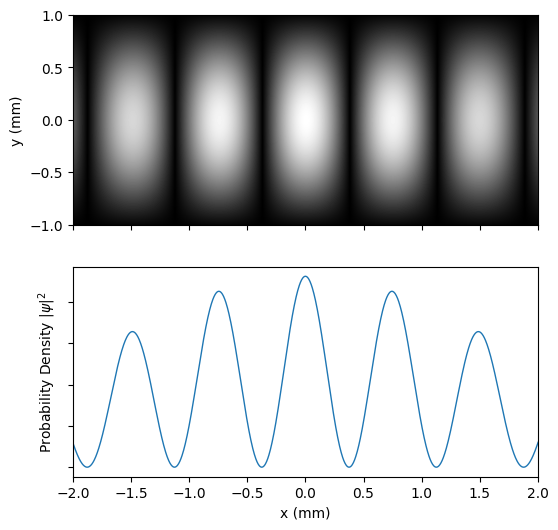

In [29]:
import numpy as np

class Sheet():
    def __init__(self,extent_x, extent_y, Nx, Ny):

        self.dx = extent_x/Nx
        self.dy = extent_y/Ny

        self.x = self.dx*(np.arange(Nx)-Nx//2)
        self.y = self.dy*(np.arange(Ny)-Ny//2)
        self.xx, self.yy = np.meshgrid(self.x, self.y)
        
        self.Nx = int(Nx)
        self.Ny = int(Ny)
        self.E = np.zeros((self.Ny, self.Nx))

        

    def rectangular_slit(self,x0, y0, lx, ly):
        """
        Creates a slit centered at the point (x0, y0) with width lx and height ly
        """
        self.E += np.select( [((self.xx > (x0 - lx/2) ) & (self.xx < (x0 + lx/2) )) & ((self.yy > (y0 - ly/2) ) & (self.yy < (y0 + ly/2) )),  True], [1, 0])


#simulation input:

Lx = 1.4
Ly = 0.4
Nx= 2500
Ny= 1500

sheet = Sheet(extent_x = 2*Lx , extent_y = 2*Ly, Nx= Nx, Ny= Ny)

#slit separation 
mm = 1e-4
D = 128 * mm

sheet.rectangular_slit(x0 = -D/2, y0 = 0, lx = 22 * mm , ly = 88 * mm)
sheet.rectangular_slit(x0 = +D/2, y0 = 0, lx = 22 * mm , ly = 88 * mm)

# distance from slit to the screen (mm)
z = 5000

# wavelength (mm)
λ = 18.5*1e-7
k = 2*np.pi/λ

from scipy.fftpack import fft2
from scipy.fftpack import fftshift

fft_c = fft2(sheet.E * np.exp(1j * k/(2*z) *(sheet.xx**2 + sheet.yy**2)))
c = fftshift(fft_c)



#plot with matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(2,1,1)  
ax2 = fig.add_subplot(2,1,2,sharex=ax1, yticklabels=[])  

abs_c = np.absolute(c)

#screen size mm
dx_screen = z*λ/(2*Lx)
dy_screen = z*λ/(2*Ly)
x_screen = dx_screen * (np.arange(Nx)-Nx//2)
y_screen = dy_screen * (np.arange(Ny)-Ny//2)


ax1.imshow(abs_c, extent = [x_screen[0], x_screen[-1]+dx_screen, y_screen[0], y_screen[-1]+dy_screen], cmap ='gray', interpolation = "bilinear", aspect = 'auto')

ax2.plot(x_screen, abs_c[Ny//2]**2, linewidth = 1)

ax1.set_ylabel("y (mm)")
ax2.set_xlabel("x (mm)")
ax2.set_ylabel("Probability Density $|\psi|^{2}$")
ax1.set_xlim([-2,2])
ax2.set_xlim([-2,2])
ax1.set_ylim([-1,1])
plt.setp(ax1.get_xticklabels(), visible=False)


plt.show()

### Double-slit diffraction

doble slits

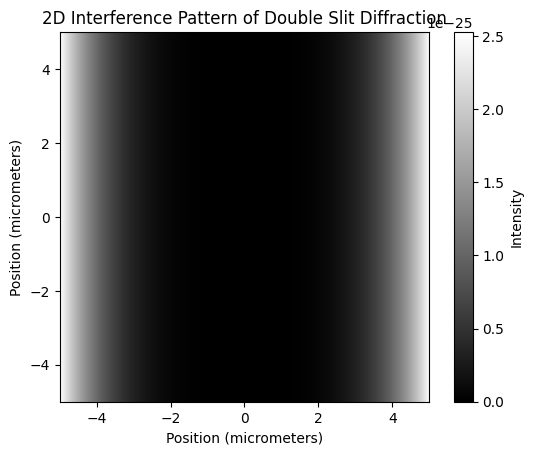

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def double_slit_intensity_2d(wavelength, slit_width, slit_distance, distance, num_pixels):
    # Define grid of points on the observation plane
    x = np.linspace(-slit_width * 5, slit_width * 5, num_pixels)
    y = np.linspace(-slit_width * 5, slit_width * 5, num_pixels)
    X, Y = np.meshgrid(x, y)

    # Distance from the slits to the observation plane
    r1 = np.sqrt((X - slit_distance / 2)**2 + Y**2 + distance**2)
    r2 = np.sqrt((X + slit_distance / 2)**2 + Y**2 + distance**2)

    # Calculate the intensity at each point on the observation plane
    intensity = (np.cos(np.pi * slit_width / wavelength * np.arctan2(Y, distance))**2
                 * np.sin(np.pi * slit_width * X / (wavelength * r1))**2
                 * np.sin(np.pi * slit_width * X / (wavelength * r2))**2
                 / (np.pi**2 * r1**2 * r2**2))

    return intensity

def plot_intensity_2d(intensity):
    plt.imshow(intensity, cmap='gray', extent=(-5, 5, -5, 5))
    plt.colorbar(label='Intensity')
    plt.xlabel('Position (micrometers)')
    plt.ylabel('Position (micrometers)')
    plt.title('2D Interference Pattern of Double Slit Diffraction')
    plt.show()

# Parameters
wavelength = 0.5e-6      # Wavelength of light in meters (e.g., 500 nm)
slit_width = 10e-6        # Width of each slit in meters (e.g., 1 micrometer)
slit_distance = 5e-5     # Distance between the slits in meters (e.g., 5 micrometers)
distance = 50            # Distance from the slits to the observation plane in meters
num_pixels = 500         # Number of pixels along each dimension of the observation plane

# Calculate intensity distribution
intensity_2d = double_slit_intensity_2d(wavelength, slit_width, slit_distance, distance, num_pixels)

# Plot intensity distribution
plot_intensity_2d(intensity_2d)


## Bibliography

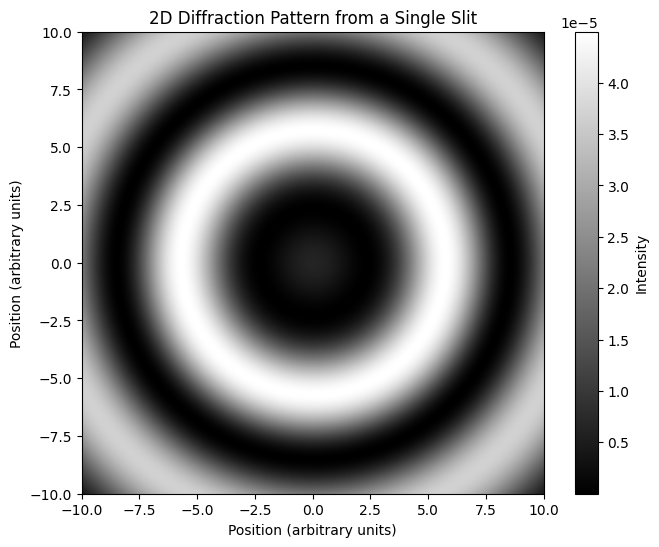

In [ ]:
"""
   small point
"""

import numpy as np
import matplotlib.pyplot as plt

# Constants
wavelength = 0.5  # Wavelength of light (in arbitrary units)
screen_distance = 10.0  # Distance to the screen (in arbitrary units)
screen_size = 20.0  # Size of the screen (in arbitrary units)
num_points = 500  # Number of points on the screen

# Define coordinates on the screen
x = np.linspace(-screen_size / 2, screen_size / 2, num_points)
y = np.linspace(-screen_size / 2, screen_size / 2, num_points)
X, Y = np.meshgrid(x, y)

# Calculate the distance from each point on the screen to the source (assumed to be at the origin)
r = np.sqrt(X**2 + Y**2 + screen_distance**2)

# Calculate the phase difference
phase_difference = (2 * np.pi / wavelength) * r

# Calculate the intensity using Fraunhofer diffraction formula
intensity = (1 / r**2) * (np.sin(phase_difference) / phase_difference)**2

# Plot the intensity
plt.figure(figsize=(8, 6))
plt.imshow(intensity, extent=[-screen_size/2, screen_size/2, -screen_size/2, screen_size/2], cmap='gray')
plt.colorbar(label='Intensity')
plt.title('2D Diffraction Pattern from a Single Point Source')
plt.xlabel('Position (arbitrary units)')
plt.ylabel('Position (arbitrary units)')
plt.show()

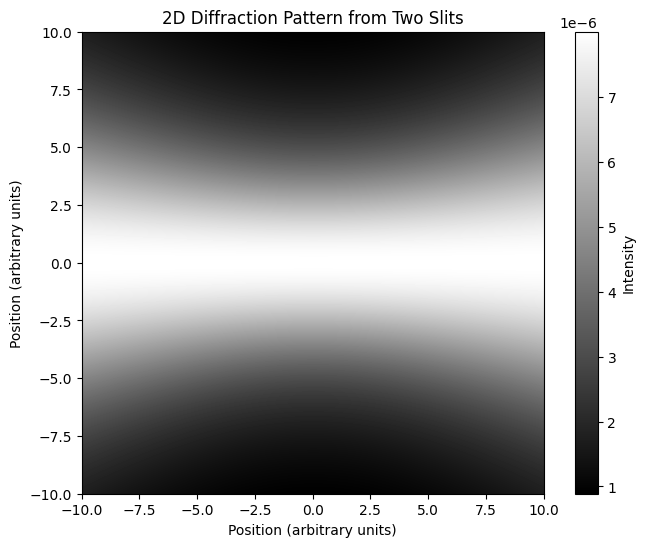

In [18]:
"""
 doble slit
"""


import numpy as np
import matplotlib.pyplot as plt

# Constants
wavelength = 0.5  # Wavelength of light (in arbitrary units)
slit_width = 0.1  # Width of each slit (in arbitrary units)
slit_distance = 0.5  # Distance between the centers of the two slits (in arbitrary units)
screen_distance = 10.0  # Distance to the screen (in arbitrary units)
screen_size = 20.0  # Size of the screen (in arbitrary units)
num_points = 500  # Number of points on the screen

# Define coordinates on the screen
x = np.linspace(-screen_size / 2, screen_size / 2, num_points)
y = np.linspace(-screen_size / 2, screen_size / 2, num_points)
X, Y = np.meshgrid(x, y)

# Calculate the distance from each point on the screen to the centers of the two slits
r1 = np.sqrt((X - slit_distance / 2)**2 + Y**2 + screen_distance**2)
r2 = np.sqrt((X + slit_distance / 2)**2 + Y**2 + screen_distance**2)

# Calculate the phase difference for each slit
phase_difference_1 = (2 * np.pi / wavelength) * slit_width * np.sin(np.arctan(Y / r1))
phase_difference_2 = (2 * np.pi / wavelength) * slit_width * np.sin(np.arctan(Y / r2))

# Calculate the intensity for each slit
intensity_1 = (slit_width**2 / (wavelength * screen_distance))**2 * (np.sinc(phase_difference_1))**2
intensity_2 = (slit_width**2 / (wavelength * screen_distance))**2 * (np.sinc(phase_difference_2))**2

# Total intensity is the sum of intensities from both slits
total_intensity = intensity_1 + intensity_2

# Plot the intensity
plt.figure(figsize=(8, 6))
plt.imshow(total_intensity, extent=[-screen_size/2, screen_size/2, -screen_size/2, screen_size/2], cmap='gray')
plt.colorbar(label='Intensity')
plt.title('2D Diffraction Pattern from Two Slits')
plt.xlabel('Position (arbitrary units)')
plt.ylabel('Position (arbitrary units)')
plt.show()

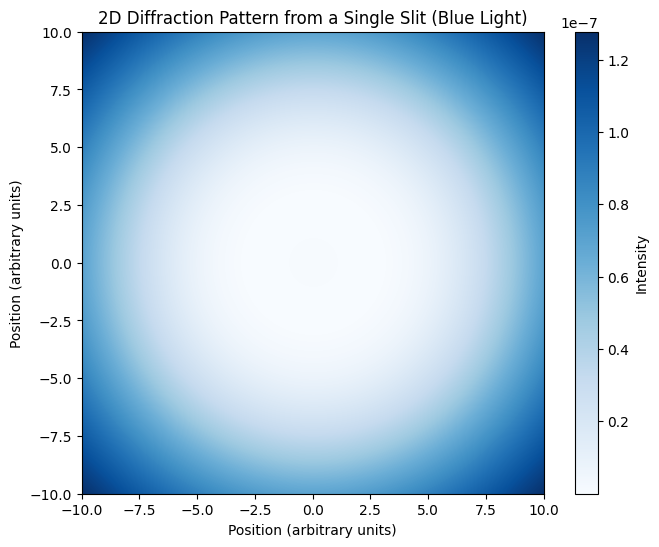

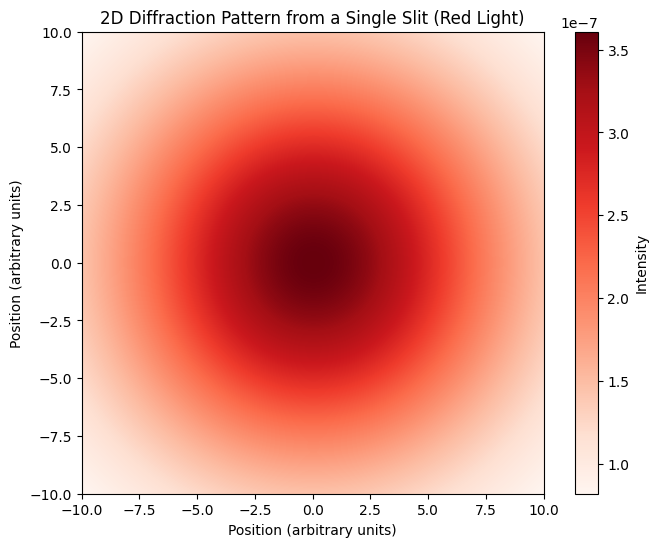

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
wavelength_blue = 0.45  # Wavelength of blue light (in arbitrary units)
wavelength_red = 0.65  # Wavelength of red light (in arbitrary units)
slit_width = 0.1  # Width of the slit (in arbitrary units)
screen_distance = 10.0  # Distance to the screen (in arbitrary units)
screen_size = 20.0  # Size of the screen (in arbitrary units)
num_points = 500  # Number of points on the screen

# Define coordinates on the screen
x = np.linspace(-screen_size / 2, screen_size / 2, num_points)
y = np.linspace(-screen_size / 2, screen_size / 2, num_points)
X, Y = np.meshgrid(x, y)

# Calculate the distance from each point on the screen to the slit
r = np.sqrt(X**2 + Y**2 + screen_distance**2)

# Calculate the phase difference for blue light
phase_difference_blue = (2 * np.pi / wavelength_blue) * slit_width * np.sin(np.arctan(r / screen_distance))

# Calculate the phase difference for red light
phase_difference_red = (2 * np.pi / wavelength_red) * slit_width * np.sin(np.arctan(r / screen_distance))

# Calculate the intensity for blue light
intensity_blue = (slit_width**2 / (wavelength_blue * screen_distance))**2 * (np.sinc(phase_difference_blue))**2

# Calculate the intensity for red light
intensity_red = (slit_width**2 / (wavelength_red * screen_distance))**2 * (np.sinc(phase_difference_red))**2

# Plot the intensity for blue light
plt.figure(figsize=(8, 6))
plt.imshow(intensity_blue, extent=[-screen_size/2, screen_size/2, -screen_size/2, screen_size/2], cmap='Blues')
plt.colorbar(label='Intensity')
plt.title('2D Diffraction Pattern from a Single Slit (Blue Light)')
plt.xlabel('Position (arbitrary units)')
plt.ylabel('Position (arbitrary units)')
plt.show()

# Plot the intensity for red light
plt.figure(figsize=(8, 6))
plt.imshow(intensity_red, extent=[-screen_size/2, screen_size/2, -screen_size/2, screen_size/2], cmap='Reds')
plt.colorbar(label='Intensity')
plt.title('2D Diffraction Pattern from a Single Slit (Red Light)')
plt.xlabel('Position (arbitrary units)')
plt.ylabel('Position (arbitrary units)')
plt.show()


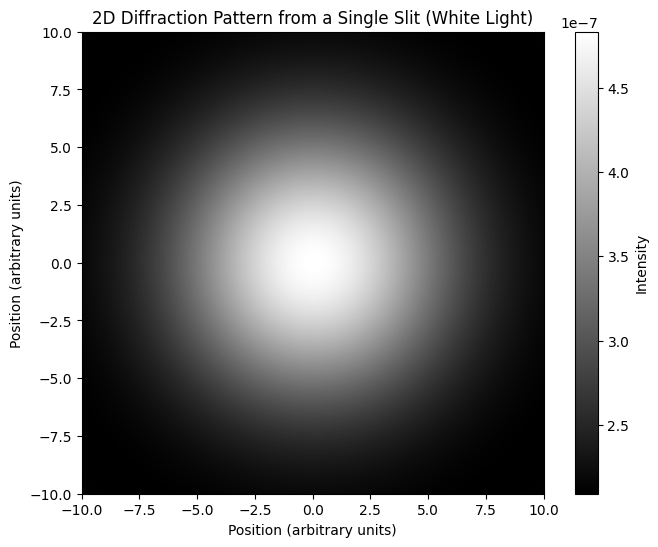

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
slit_width = 0.1  # Width of the slit (in arbitrary units)
screen_distance = 10.0  # Distance to the screen (in arbitrary units)
screen_size = 20.0  # Size of the screen (in arbitrary units)
num_points = 500  # Number of points on the screen

# Define wavelengths for red, green, and blue light
wavelengths = {'red': 0.65, 'green': 0.53, 'blue': 0.45}  # Arbitrary units

# Define coordinates on the screen
x = np.linspace(-screen_size / 2, screen_size / 2, num_points)
y = np.linspace(-screen_size / 2, screen_size / 2, num_points)
X, Y = np.meshgrid(x, y)

# Initialize total intensity as zeros
total_intensity = np.zeros((num_points, num_points))

# Calculate diffraction pattern for each wavelength
for color, wavelength in wavelengths.items():
    # Calculate the distance from each point on the screen to the slit
    r = np.sqrt(X**2 + Y**2 + screen_distance**2)

    # Calculate the phase difference for the current wavelength
    phase_difference = (2 * np.pi / wavelength) * slit_width * np.sin(np.arctan(r / screen_distance))

    # Calculate the intensity for the current wavelength
    intensity = (slit_width**2 / (wavelength * screen_distance))**2 * (np.sinc(phase_difference))**2

    # Add intensity for the current wavelength to the total intensity
    total_intensity += intensity

# Plot the total intensity representing white light
plt.figure(figsize=(8, 6))
plt.imshow(total_intensity, extent=[-screen_size/2, screen_size/2, -screen_size/2, screen_size/2], cmap='gray')
plt.colorbar(label='Intensity')
plt.title('2D Diffraction Pattern from a Single Slit (White Light)')
plt.xlabel('Position (arbitrary units)')
plt.ylabel('Position (arbitrary units)')
plt.show()


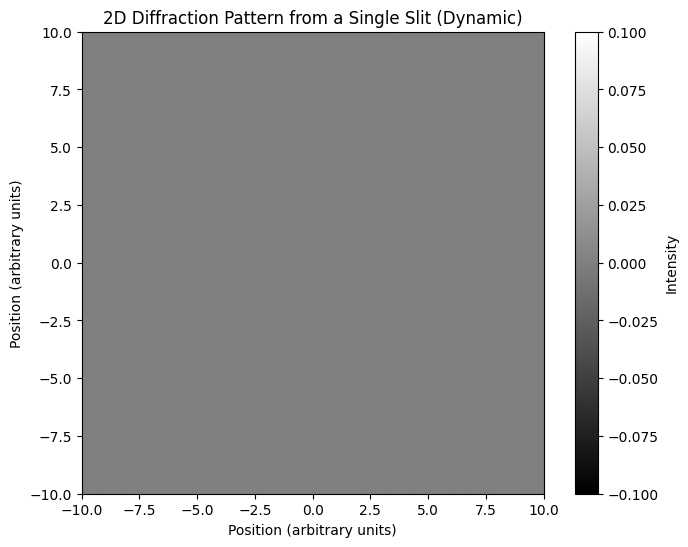

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
slit_width = 0.1  # Width of the slit (in arbitrary units)
screen_distance = 10.0  # Distance to the screen (in arbitrary units)
screen_size = 20.0  # Size of the screen (in arbitrary units)
num_points = 500  # Number of points on the screen

# Define wavelengths for red, green, and blue light
wavelengths = np.linspace(0.4, 0.7, 100)  # Continuous range of wavelengths in the visible spectrum

# Define coordinates on the screen
x = np.linspace(-screen_size / 2, screen_size / 2, num_points)
y = np.linspace(-screen_size / 2, screen_size / 2, num_points)
X, Y = np.meshgrid(x, y)

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 6))
intensity_plot = ax.imshow(np.zeros((num_points, num_points)), extent=[-screen_size/2, screen_size/2, -screen_size/2, screen_size/2], cmap='gray')
plt.colorbar(intensity_plot, ax=ax, label='Intensity')
ax.set_title('2D Diffraction Pattern from a Single Slit (Dynamic)')
ax.set_xlabel('Position (arbitrary units)')
ax.set_ylabel('Position (arbitrary units)')

# Function to update the plot for each wavelength
def update(wavelength):
    # Calculate the distance from each point on the screen to the slit
    r = np.sqrt(X**2 + Y**2 + screen_distance**2)

    # Calculate the phase difference for the current wavelength
    phase_difference = (2 * np.pi / wavelength) * slit_width * np.sin(np.arctan(r / screen_distance))

    # Calculate the intensity for the current wavelength
    intensity = (slit_width**2 / (wavelength * screen_distance))**2 * (np.sinc(phase_difference))**2

    # Update the intensity plot
    intensity_plot.set_array(intensity)

# Create the animation
ani = FuncAnimation(fig, update, frames=wavelengths, interval=50)

# Show the animation
plt.show()


In [ ]:
# pip install ipywidgets

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def plot_diffraction(wavelength):
    # Constants
    slit_width = 0.1  # Width of the slit (in arbitrary units)
    screen_distance = 10.0  # Distance to the screen (in arbitrary units)
    screen_size = 20.0  # Size of the screen (in arbitrary units)
    num_points = 500  # Number of points on the screen

    # Define coordinates on the screen
    x = np.linspace(-screen_size / 2, screen_size / 2, num_points)
    y = np.linspace(-screen_size / 2, screen_size / 2, num_points)
    X, Y = np.meshgrid(x, y)

    # Calculate the distance from each point on the screen to the slit
    r = np.sqrt(X**2 + Y**2 + screen_distance**2)

    # Calculate the phase difference
    phase_difference = (2 * np.pi / wavelength) * slit_width * np.sin(np.arctan(r / screen_distance))

    # Calculate the intensity using Fresnel diffraction formula
    intensity = (slit_width**2 / (wavelength * screen_distance))**2 * (np.sinc(phase_difference))**2

    # Plot the intensity
    plt.figure(figsize=(8, 6))
    plt.imshow(intensity, extent=[-screen_size/2, screen_size/2, -screen_size/2, screen_size/2], cmap='gray')
    plt.colorbar(label='Intensity')
    plt.title(f'2D Diffraction Pattern from a Single Slit (Wavelength: {wavelength} arbitrary units)')
    plt.xlabel('Position (arbitrary units)')
    plt.ylabel('Position (arbitrary units)')
    plt.show()

# Define the wavelength slider
wavelength_slider = FloatSlider(value=0.5, min=0.4, max=0.7, step=0.01, description='Wavelength')

# Create the interactive plot
interact(plot_diffraction, wavelength=wavelength_slider);


interactive(children=(FloatSlider(value=0.5, description='Wavelength', max=0.7, min=0.4, step=0.01), Output())…


Diffraction plays a crucial role in many areas of science and technology. In optics, it explains phenomena like the spreading of light around the edges of an obstacle or the formation of patterns in a double-slit experiment. In acoustics, it influences the behavior of sound waves around obstacles and contributes to the design of concert halls and sound barriers. In X-ray crystallography, it enables scientists to determine the structure of crystalline materials by analyzing the diffraction patterns produced when X-rays pass through them.

Understanding diffraction provides valuable insights into the behavior of waves and is essential for various applications, from designing optical devices to analyzing the structure of materials.